<a href="https://colab.research.google.com/github/mbauergit/Alzheimer-BioActivity-Analysis/blob/main/Alzheimers_ML_BioActivityData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1 ##

### Import ChEMBL Database and Libraries ###

In [1]:
! pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Search for Target Protein ###

In [4]:
# Target search for alzheimers
target = new_client.target
query_word = 'alzheimer'
target_query = target.search(query_word)
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,13.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Nicastrin,11.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,11.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid-beta A4 protein,9.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,8.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,[],Homo sapiens,Amyloid-beta A4 protein,7.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


In [5]:
# Select and retrieve data for Amyloid-beta A4 protein
selected_target = targets.target_chembl_id[5]
selected_target

'CHEMBL2487'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,None,None,25720807,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1716,None,None,25720808,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1717,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720809,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1718,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720810,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,26.6


In [7]:
# Save Data to Directory
df.to_csv('/content/drive/MyDrive/Bio Project/Data/alzheimer_bioactivity_data_raw.csv', index=False)


In [ ]:
! ls -l '/content/drive/MyDrive/Bio Project/Data'

total 136
-rw------- 1 root root 138803 Jan 17 21:26 coronavirus_bioactivity_data_raw.csv


In [ ]:
! head coronavirus_bioactivity_data_raw.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,,,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg Med Chem Lett,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei'

### Preprocess Data ###

In [8]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,None,None,25720807,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1716,None,None,25720808,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1717,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720809,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1718,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720810,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,26.6


#### Label Compounds as Active, Inactive, or Intermediate ####

The bioactivity data is in IC50 unit. Compounds having values of less than 1000 nM will be considered **active** while those greater than 10,000 nM will be considered **inactive**. Values in between will be **intermediate**.

In [9]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [10]:
# Extract molecule_chembl, canonical_smiles, and standard_value from df
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2[selection]
df3['bioactivity_class'] = bioactivity_class
df3

<ipython-input-10-6cef3a23969c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bioactivity_class'] = bioactivity_class


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1715,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,50000.0,inactive
1716,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,50000.0,inactive
1717,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,50000.0,inactive
1718,CHEMBL5411138,COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O,26600.0,inactive


In [11]:
df3.to_csv('/content/drive/MyDrive/Bio Project/Data/alzheimer_bioactivity_preprocessed_data.csv', index=False)

## Part 2 ##

### Calculate Lipinski Descriptors ###

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton

Octanol-water partition coefficient (LogP) < 5

Hydrogen bond donors < 5

Hydrogen bond acceptors < 10

In [12]:
!pip install rdkit
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 50.0 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
preprocessed_df = pd.read_csv('/content/drive/MyDrive/Bio Project/Data/alzheimer_bioactivity_preprocessed_data.csv')

In [14]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(df, verbose=False):

    smiles = df.canonical_smiles

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    df = pd.concat([df,descriptors], axis=1)

    return df

lipinski_df = lipinski(preprocessed_df)
lipinski_df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.3188,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.2412,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.3188,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.8331,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.9422,1.0,2.0
...,...,...,...,...,...,...,...,...
1493,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,50000.0,inactive,341.407,3.0735,1.0,5.0
1494,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,50000.0,inactive,327.380,2.7705,2.0,5.0
1495,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,50000.0,inactive,324.356,2.7788,2.0,4.0
1496,CHEMBL5411138,COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O,26600.0,inactive,276.288,1.3541,1.0,5.0


### Convert IC50 to pIC50 ###
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [15]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns=['standard_value_norm'])

    return x

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['standard_value'])

    return x

normalized_df = norm_value(lipinski_df)
final_df = pIC50(normalized_df)
final_df

<ipython-input-15-43b09a25148c>:10: RuntimeWarning: invalid value encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1493,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,inactive,341.407,3.0735,1.0,5.0,4.301030
1494,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2.0,5.0,4.301030
1495,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2.0,4.0,4.301030
1496,CHEMBL5411138,COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O,inactive,276.288,1.3541,1.0,5.0,4.575118


In [16]:
final_df.to_csv('/content/drive/MyDrive/Bio Project/Data/alzheimer_bioactivity_data_curated_3_class.csv', index=False)

In [17]:
# Delete intermediate class
final_df = final_df[final_df['bioactivity_class'] != 'intermediate']
final_df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.6808,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
1493,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,inactive,341.407,3.0735,1.0,5.0,4.301030
1494,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2.0,5.0,4.301030
1495,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2.0,4.0,4.301030
1496,CHEMBL5411138,COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O,inactive,276.288,1.3541,1.0,5.0,4.575118


### EDA (Chemical Space Analysis) via Lipinski Descriptors ###

#### Simple Plots ####

In [18]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

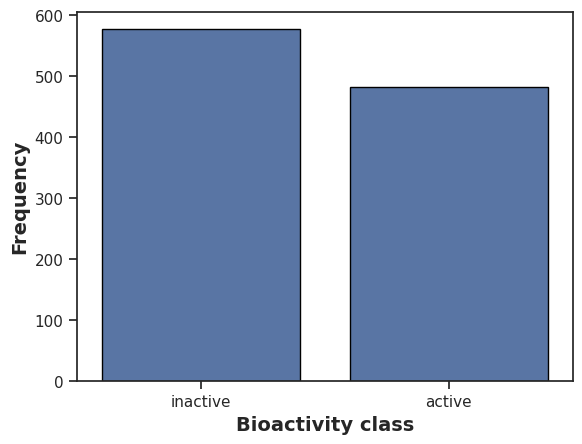

In [19]:
# Frequencey plot of the two classes
sns.countplot(x='bioactivity_class', data=final_df, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

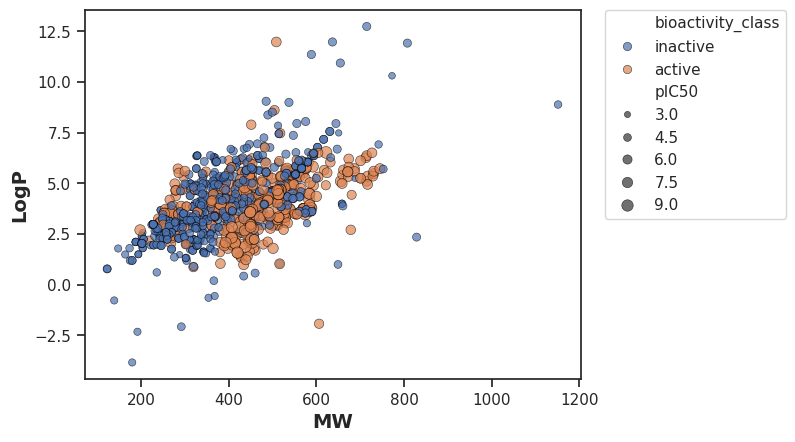

In [20]:
# Scatter plot of MW versus LogP
sns.scatterplot(x='MW', y='LogP', data=final_df, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Text(0, 0.5, 'pIC50 value')

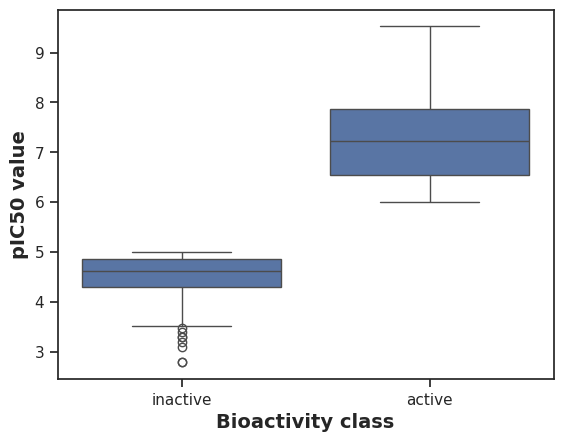

In [21]:
 # Boxplot of pIC50
 sns.boxplot(x='bioactivity_class', y='pIC50', data=final_df)
 plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
 plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')


#### Statistical Analysis | Mann-Whitney U Test ####

In [22]:
def mannwhitney(descriptor, input_df, verbose=False):
    # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

    # seed the random number generator
    seed(1)

    # actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = input_df[selection]
    active = df[df['bioactivity_class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'bioactivity_class']
    df = input_df[selection]
    inactive = df[df['bioactivity_class'] == 'inactive']
    inactive = inactive[descriptor]

    # compare samples
    stat, p = mannwhitneyu(active, inactive)
    #print('Statistics=%.3f, p=%.3f' % (stat, p))

    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor,
                        'Statistics':stat,
                        'p':p,
                        'alpha':alpha,
                        'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

mannwhitney('pIC50', final_df)

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,185621.0,5.746089e-21,0.05,Different distribution (reject H0)


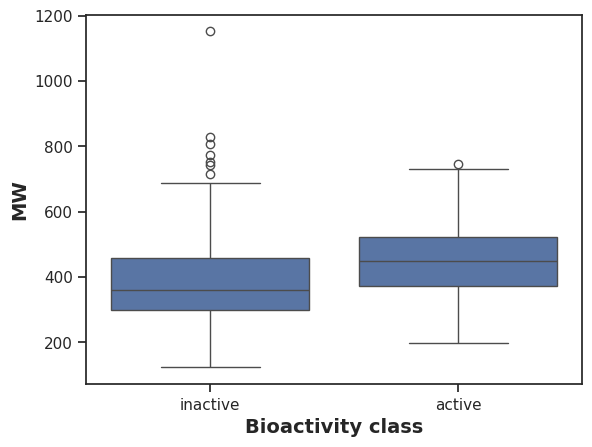

In [23]:
# Analysis for Molecular Weight
sns.boxplot(x='bioactivity_class', y='MW', data=final_df)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

mannwhitney('MW', final_df)

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,152523.5,0.00659,0.05,Different distribution (reject H0)


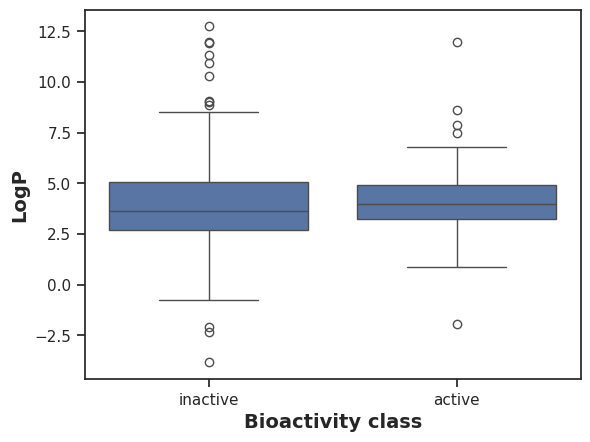

In [24]:
# Analysis for LogP
sns.boxplot(x='bioactivity_class', y='LogP', data=final_df)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

mannwhitney('LogP', final_df)

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,113400.0,7.957751e-08,0.05,Different distribution (reject H0)


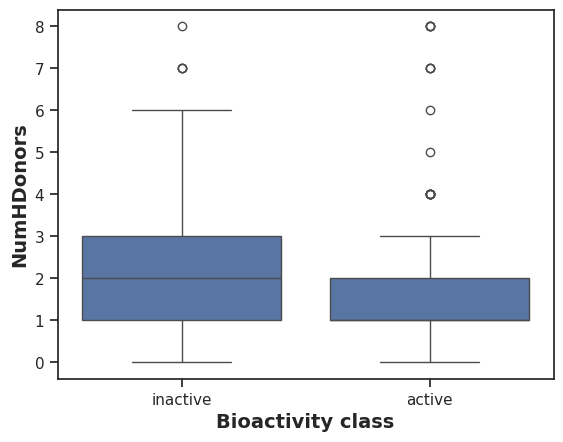

In [25]:
# Analysis for Number of Hydrogen Donors
sns.boxplot(x='bioactivity_class', y='NumHDonors', data=final_df)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

mannwhitney('NumHDonors', final_df)

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,176065.0,3.478651e-14,0.05,Different distribution (reject H0)


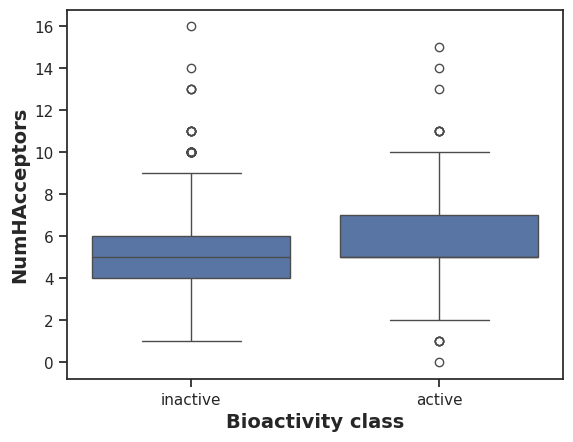

In [26]:
# Analysis for Number of Hydrogen Acceptors
sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=final_df)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

mannwhitney('NumHAcceptors', final_df)

In [27]:
final_df.to_csv('/content/drive/MyDrive/Bio Project/Data/alzheimer_bioactivity_data_curated.csv', index=False)

## Part 3 ##

### Download PaDEL-Descriptor ###

In [28]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2025-01-20 19:24:03--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-01-20 19:24:03--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   153MB/s    in 0.2s    

2025-01-20 19:24:04 (153 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2025-01-20 19:24:04--  https://github

In [29]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Bio Project/Data/alzheimer_bioactivity_data_curated_3_class.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1493,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,inactive,341.407,3.0735,1.0,5.0,4.301030
1494,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,inactive,327.380,2.7705,2.0,5.0,4.301030
1495,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,inactive,324.356,2.7788,2.0,4.0,4.301030
1496,CHEMBL5411138,COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O,inactive,276.288,1.3541,1.0,5.0,4.575118


In [32]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [33]:
! cat molecule.smi | head -5

CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1	CHEMBL311039
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1	CHEMBL450926
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(F)cc1	CHEMBL310242
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1	CHEMBL74874
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1	CHEMBL75183


In [34]:
! cat molecule.smi | wc -l

1498


### Calculate Fingerprint Descriptors ###

In [35]:
# Calculate PaDEL descriptors
! bash padel.sh

Processing CHEMBL311039 in molecule.smi (1/1498). 
Processing CHEMBL450926 in molecule.smi (2/1498). 
Processing CHEMBL310242 in molecule.smi (3/1498). Average speed: 3.97 s/mol.
Processing CHEMBL74874 in molecule.smi (4/1498). Average speed: 2.18 s/mol.
Processing CHEMBL75183 in molecule.smi (5/1498). Average speed: 1.62 s/mol.
Processing CHEMBL563 in molecule.smi (6/1498). Average speed: 1.29 s/mol.
Processing CHEMBL196279 in molecule.smi (7/1498). Average speed: 1.18 s/mol.
Processing CHEMBL195970 in molecule.smi (8/1498). Average speed: 0.99 s/mol.
Processing CHEMBL195970 in molecule.smi (9/1498). Average speed: 0.95 s/mol.
Processing CHEMBL264006 in molecule.smi (10/1498). Average speed: 0.85 s/mol.
Processing CHEMBL264006 in molecule.smi (11/1498). Average speed: 0.98 s/mol.
Processing CHEMBL193971 in molecule.smi (12/1498). Average speed: 0.98 s/mol.
Processing CHEMBL194274 in molecule.smi (13/1498). Average speed: 0.89 s/mol.
Processing CHEMBL196321 in molecule.smi (14/1498). A

### Prepare X and Y Data Matrices ###

In [36]:
df_X = pd.read_csv('/content/drive/MyDrive/Bio Project/Data/descriptors_output.csv')
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL450926,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL311039,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL310242,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL74874,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL563,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,CHEMBL448891,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1494,CHEMBL1235966,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,CHEMBL5411138,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,CHEMBL5434024,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1494,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1495,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1496,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_Y = df['pIC50']
df_combined = pd.concat([df_X, df_Y], axis=1)
df_combined

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.568636
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1494,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1495,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1496,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.575118


In [39]:
df_combined.to_csv('/content/drive/MyDrive/Bio Project/Data/alzheimer_bioactivity_data_3_class_pIC50_pubchem_fp.csv', index=False)
#

## Part 4 ##

In [40]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
import numpy as np

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Bio Project/Data/alzheimer_bioactivity_data_3_class_pIC50_pubchem_fp.csv')
df = df.dropna()
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.568636
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1494,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1495,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1496,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.575118


In [51]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [52]:
# Remove low varaince features
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(1496, 172)

In [53]:
# Split Data 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [54]:
# Build Random Forest Regression Model
np.random.seed(1)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6449764597852286

In [55]:
Y_pred = model.predict(X_test)

### Predicted Vs Actual Plot ###

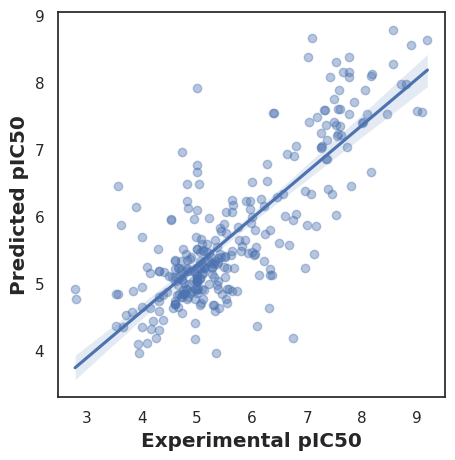

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show()